In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [133]:
import pandas as pd

df_initial = pd.read_csv("C:\data_science\sales_forecasting\data\Online_Retail.csv")
df_initial.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [134]:
df_initial.shape

(541909, 8)

# Inferential statistics for the dataframe

In [135]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Descriptive statistics for the dataframe

In [136]:
# Display descriptive statistics for both object and numerical columns
df_initial.describe(include=['object', 'number'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,31-10-2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


# finding sum of null values

In [137]:
df_initial.isna().sum().sort_values(ascending=False)


CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

# dropping the null values to avoid noise in the final output and analysis dataset will only contain entries with valid customer IDs and Description fields

In [138]:
df_initial.dropna(inplace=True)
df_initial.shape

(406829, 8)

In [139]:
df_initial.isna().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [140]:
# Display descriptive statistics for both object and numerical columns

df_initial.describe(include=['object', 'number'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,406829,406829,406829,406829.000000,406829,406829.000000,406829.000000,406829
unique,22190,3684,3896,NaN,20460,NaN,NaN,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,14-11-2011 15:27,NaN,NaN,United Kingdom
freq,542,2077,2070,NaN,543,NaN,NaN,361878
mean,NaN,NaN,NaN,12.061303,NaN,3.460471,15287.690570,NaN
std,NaN,NaN,NaN,248.693370,NaN,69.315162,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,0.000000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,5.000000,NaN,1.950000,15152.000000,NaN
75%,NaN,NaN,NaN,12.000000,NaN,3.750000,16791.000000,NaN


# removing the columns having minimum values '0' unitprice inidicating free item or data entry error which are unusal for our analysis.

In [141]:
df_initial[df_initial['UnitPrice']==0].describe()

,Quantity,UnitPrice,CustomerID
count,40.000000,40.0,40.000000
mean,347.100000,0.0,14217.225000
std,1978.311813,0.0,1676.321178
min,1.000000,0.0,12415.000000
25%,1.000000,0.0,12722.750000
50%,4.500000,0.0,13985.000000
75%,24.000000,0.0,15225.500000
max,12540.000000,0.0,18059.000000


# saving the data which unitprice is greater than '0'

In [142]:
# Removing records with a unit price of zero to avoid potential data entry errors
df_initial = df_initial[df_initial['UnitPrice'] > 0]

# Finding duplicate rows

In [143]:

duplicate_rows = df_initial[df_initial.duplicated(keep=False)]

duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID','Quantity'])

duplicate_rows_sorted.head(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,01-12-2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,01-12-2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,01-12-2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,01-12-2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,01-12-2010 11:45,2.10,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,01-12-2010 11:45,2.10,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,01-12-2010 11:45,2.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,01-12-2010 11:45,2.95,17908.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,01-12-2010 11:49,1.65,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,01-12-2010 11:49,1.65,17920.0,United Kingdom


In [144]:
print(f"The dataset contains {df_initial.duplicated().sum()} duplicate rows that need to be removed.")

The dataset contains 5225 duplicate rows that need to be removed.


# Droping duplicates based on customerID, InvoiceNO, StockCode and Description fields

In [145]:
df_initial = df_initial.drop_duplicates(subset=['InvoiceNo', 'StockCode','Description'], keep='first')

# Display the cleaned DataFrame
print("DataFrame after removing duplicates:")
df_initial.head(50)

DataFrame after removing duplicates:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom


In [146]:
df_initial.shape

(396649, 8)

# Treating Cancelled Transactions

In [147]:
# Filter out the rows with InvoiceNo starting with "C" and create a new column indicating the transaction status
df_initial['Transaction_Status'] = np.where(df_initial['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

# Analyze the characteristics of these rows (considering the new column)
cancelled_transactions = df_initial[df_initial['Transaction_Status'] == 'Cancelled']
cancelled_transactions.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom,Cancelled
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom,Cancelled
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom,Cancelled
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom,Cancelled
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom,Cancelled


In [148]:
cancelled_transactions.shape

(8806, 9)

# Creating a data frame those transaction_status are "Completed" as cleaned data

In [149]:
# Filter out the rows with InvoiceNo starting with "C" and create a new column indicating the transaction status
df_initial['Transaction_Status'] = np.where(df_initial['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

# Analyze the characteristics of these rows (considering the new column)
df_cleaned = df_initial[df_initial['Transaction_Status'] == 'Completed']

df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,Completed


In [150]:
df_cleaned.shape

(387843, 9)

# Priniting categorical and non-categorical columns

In [151]:
categorical_columns = df_cleaned.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
numerical_columns = df_cleaned.select_dtypes(include=['int', 'float']).columns.tolist()
print(f"categorical_columns: {categorical_columns}, Numerical_columns: {numerical_columns}")


categorical_columns: ['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country', 'Transaction_Status'], Numerical_columns: ['Quantity', 'UnitPrice', 'CustomerID']


# Converting the data types into the corresponding column types

In [152]:

df_cleaned['InvoiceNo'] = df_cleaned['InvoiceNo'].astype(str)  
  
df_cleaned['StockCode'] = df_cleaned['StockCode'].astype(str)  
      
df_cleaned['Description'] = df_cleaned['Description'].astype(str)  
 
df_cleaned['CustomerID'] = df_cleaned['CustomerID'].astype(str)    
  
df_cleaned['Country'] = df_cleaned['Country'].astype(str)  

#converting InvoiceDate column into datetime format
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'], format="%d-%m-%Y %H:%M") 

df_cleaned['Quantity'] = df_cleaned['Quantity'].astype(int)    

df_cleaned['UnitPrice'] = df_cleaned['UnitPrice'].astype(float)      

# Verify the changes
print(df_cleaned.dtypes)


C:\Users\sunka\AppData\Local\Temp\ipykernel_8508\2758149490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['InvoiceNo'] = df_cleaned['InvoiceNo'].astype(str)
C:\Users\sunka\AppData\Local\Temp\ipykernel_8508\2758149490.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['StockCode'] = df_cleaned['StockCode'].astype(str)
C:\Users\sunka\AppData\Local\Temp\ipykernel_8508\2758149490.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

InvoiceNo                     object
StockCode                     object
Description                   object
Quantity                       int32
InvoiceDate           datetime64[ns]
UnitPrice                    float64
CustomerID                    object
Country                       object
Transaction_Status            object
dtype: object


C:\Users\sunka\AppData\Local\Temp\ipykernel_8508\2758149490.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['CustomerID'] = df_cleaned['CustomerID'].astype(str)
C:\Users\sunka\AppData\Local\Temp\ipykernel_8508\2758149490.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Country'] = df_cleaned['Country'].astype(str)
C:\Users\sunka\AppData\Local\Temp\ipykernel_8508\2758149490.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [153]:
df_cleaned.describe()

,Quantity,InvoiceDate,UnitPrice
count,387843.000000,387843,387843.000000
mean,13.224145,2011-07-10 11:30:44.001516032,3.121279
min,1.000000,2010-12-01 08:26:00,0.001000
25%,2.000000,2011-04-07 10:20:00,1.250000
50%,6.000000,2011-07-29 13:39:00,1.950000
75%,12.000000,2011-10-20 11:03:00,3.750000
max,80995.000000,2011-12-09 12:50:00,8142.750000
std,181.606301,NaN,21.655654


In [154]:
df_cleaned.describe(include='object')

,InvoiceNo,StockCode,Description,CustomerID,Country,Transaction_Status
count,387843,387843,387843,387843,387843,387843
unique,18532,3665,3877,4338,37,1
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17841.0,United Kingdom,Completed
freq,541,1978,1971,7477,344437,387843


# From the above descriptive analysis we have top unit sold in Unitedkingdom


In [155]:
df_cleaned['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [156]:
import folium
from geopy.geocoders import Nominatim

# Aggregating data by Country
country_data = df_cleaned.groupby('Country').agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean'
}).reset_index()

# Initialize geolocator to get coordinates
geolocator = Nominatim(user_agent="geoapiExercises")

# Function to get latitude and longitude
def get_lat_lon(country):
    location = geolocator.geocode(country)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Get latitudes and longitudes for each country
country_data['Latitude'], country_data['Longitude'] = zip(*country_data['Country'].apply(get_lat_lon))

# Filter out countries without coordinates
country_data = country_data.dropna(subset=['Latitude', 'Longitude'])

# Create a Folium map centered around the average coordinates
m = folium.Map(location=[country_data['Latitude'].mean(), country_data['Longitude'].mean()], zoom_start=2)

# Add circles to the map
for _, row in country_data.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Quantity'] / 10000,  # Adjust the radius based on quantity
        popup=(f"Country: {row['Country']}<br>"
               f"Quantity: {row['Quantity']}<br>"
               f"Average Unit Price: {row['UnitPrice']:.2f}"),
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(m)

# Display the map
m.save('country_quantity_unitprice_map.html')
m


# Aggregating the columns of the data frame to identify the patterns of the data fields

In [157]:
# Aggregating data 
aggregated_data = df_cleaned.groupby(['InvoiceDate', 'Country', 'CustomerID', 'InvoiceNo', 'StockCode', 'Description']).agg({    
    'Quantity': 'sum',         
    'UnitPrice': 'min'    
}).reset_index()

# Renaming columns for clarity
aggregated_data.columns = ['InvoiceDate' , 'Country', 'CustomerId', 'InvoiceNo', 'Stock Code','Description', 'Total Quantity', 'Unit Price']

# Save the aggregated DataFrame to a CSV file
aggregated_data.to_csv('aggregated_data.csv', index=False)

# Display the DataFrame
aggregated_data.head(37)

,InvoiceDate,Country,CustomerId,InvoiceNo,Stock Code,Description,Total Quantity,Unit Price
0,2010-12-01 08:26:00,United Kingdom,17850.0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25
1,2010-12-01 08:26:00,United Kingdom,17850.0,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65
2,2010-12-01 08:26:00,United Kingdom,17850.0,536365,71053,WHITE METAL LANTERN,6,3.39
3,2010-12-01 08:26:00,United Kingdom,17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39
4,2010-12-01 08:26:00,United Kingdom,17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
5,2010-12-01 08:26:00,United Kingdom,17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75
6,2010-12-01 08:26:00,United Kingdom,17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
7,2010-12-01 08:28:00,United Kingdom,17850.0,536366,22632,HAND WARMER RED POLKA DOT,6,1.85
8,2010-12-01 08:28:00,United Kingdom,17850.0,536366,22633,HAND WARMER UNION JACK,6,1.85
9,2010-12-01 08:34:00,United Kingdom,13047.0,536367,21754,HOME BUILDING BLOCK WORD,3,5.95


# Finding the correlation between the CustomerID and Stockcode to indentify there is any relation between the customers buying the similar products.

C:\Users\sunka\AppData\Local\Temp\ipykernel_8508\2091780673.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['CustomerID'] = pd.factorize(df_cleaned['CustomerID'])[0]
C:\Users\sunka\AppData\Local\Temp\ipykernel_8508\2091780673.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['StockCode'] = pd.factorize(df_cleaned['StockCode'])[0]


Correlation Matrix:
            CustomerID  StockCode
CustomerID    1.000000   0.089251
StockCode     0.089251   1.000000


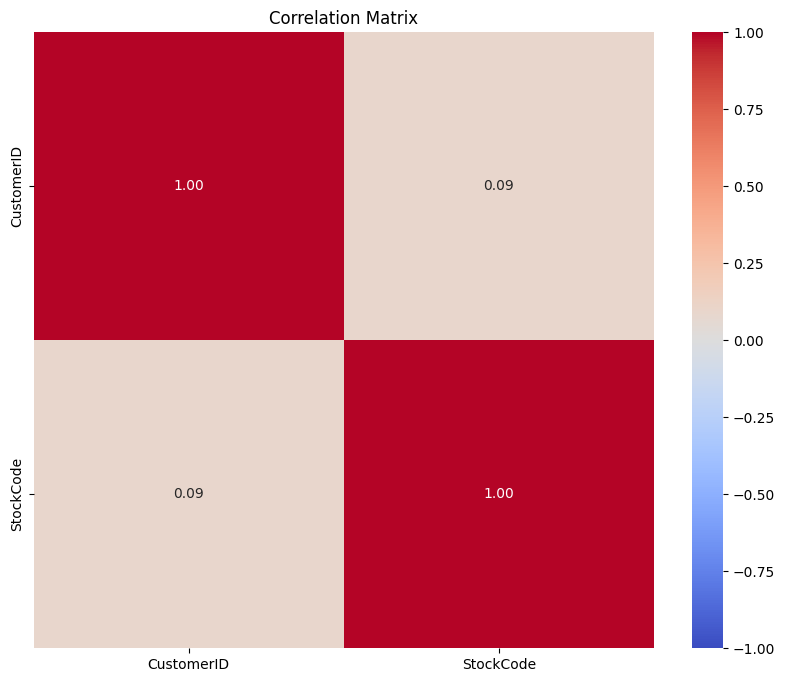

In [158]:
import seaborn as sns
# Convert categorical columns to numerical values
df_cleaned['CustomerID'] = pd.factorize(df_cleaned['CustomerID'])[0]
df_cleaned['StockCode'] = pd.factorize(df_cleaned['StockCode'])[0]

# Select numerical columns for correlation
numerical_data = df_cleaned[['CustomerID', 'StockCode']]

# Compute correlation matrix
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()



## Above matrix shows the non linear correlation matrix between customer and stock code

In [159]:
df_cleaned.head(22)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
0,536365,0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,0,United Kingdom,Completed
1,536365,1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,0,United Kingdom,Completed
2,536365,2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,0,United Kingdom,Completed
3,536365,3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,0,United Kingdom,Completed
4,536365,4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,0,United Kingdom,Completed
5,536365,5,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,0,United Kingdom,Completed
6,536365,6,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,0,United Kingdom,Completed
7,536366,7,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,0,United Kingdom,Completed
8,536366,8,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,0,United Kingdom,Completed
9,536367,9,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,1,United Kingdom,Completed


# From the above data distribution we observe unit price and quantity columns which indicates price of single unit based on them lets Create sales by multiplying unit price with quantiy of units.

In [160]:
# Calculate Sales as Quantity * UnitPrice and store it in a new column 'MaxSales'
df_cleaned['Sales'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Sort the DataFrame by the 'Sales' column in descending order
df_cleaned = df_cleaned.sort_values(by='Sales',ascending=False)

# Reset the index
df_cleaned = df_cleaned.reset_index(drop=True)

# Save the cleaned and sorted DataFrame 
df_cleaned.to_csv('data_cleaned.csv', index=False)

df_cleaned.head()




C:\Users\sunka\AppData\Local\Temp\ipykernel_8508\1612945427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Sales'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Sales
0,581483,3664,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,2604,United Kingdom,Completed,168469.60
1,541431,2549,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,1104,United Kingdom,Completed,77183.60
2,556444,185,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,2810,United Kingdom,Completed,38970.00
3,551697,45,POSTAGE,1,2011-05-03 13:46:00,8142.75,12,United Kingdom,Completed,8142.75
4,567423,3148,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,374,United Kingdom,Completed,7144.72


In [161]:
df_cleaned.shape

(387843, 10)

# sales trend of our data based on InvoiceDate and Sales of Data

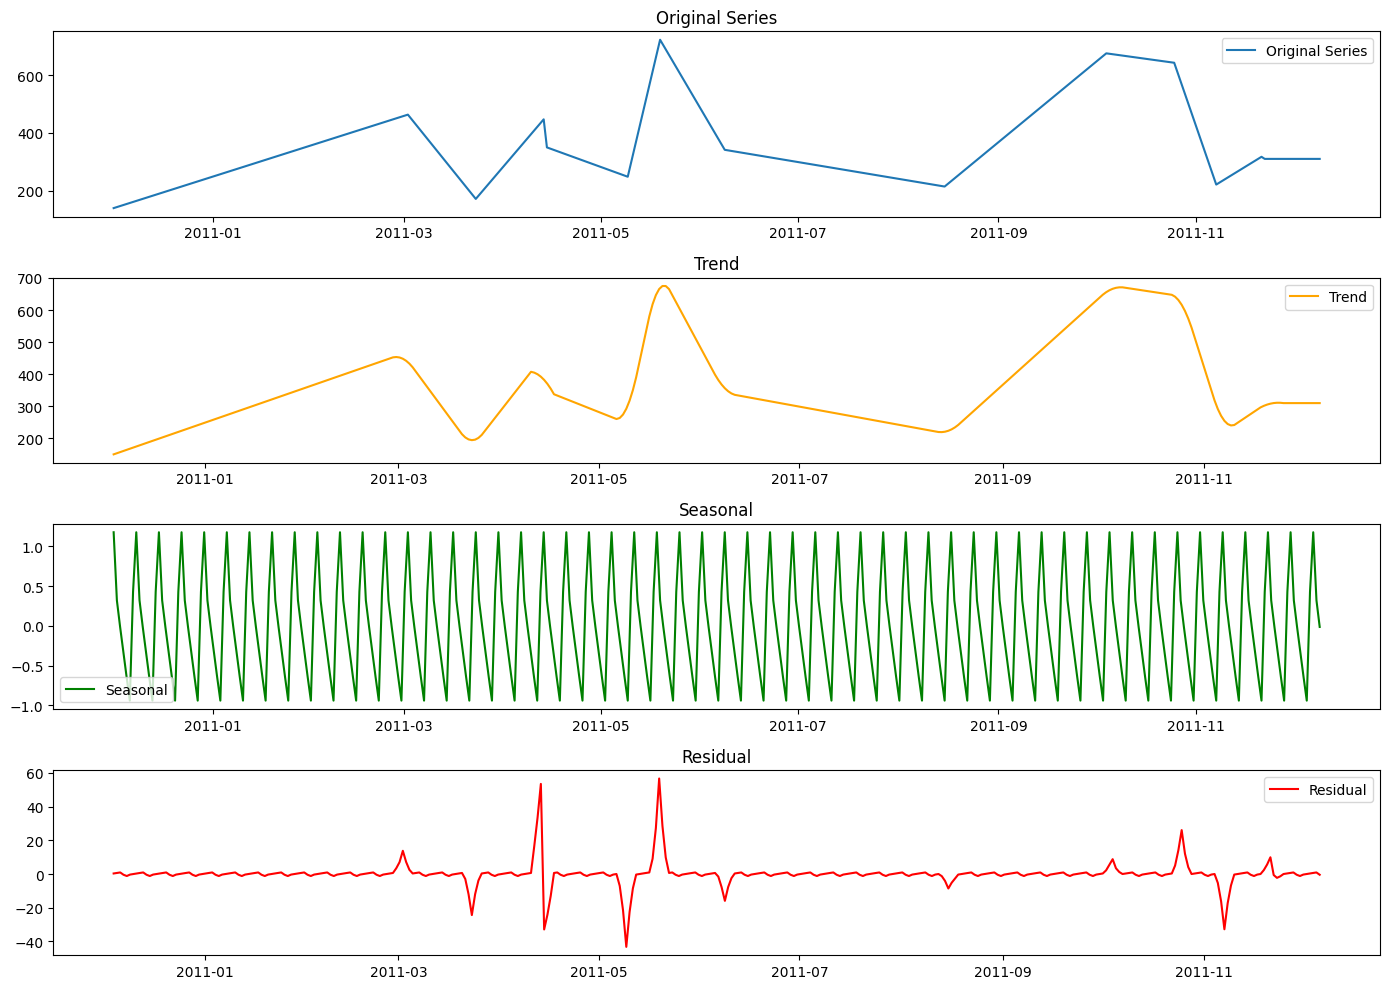

In [162]:

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


# Group by InvoiceDate and aggregate sales
sales_time_series = df_cleaned.groupby('InvoiceDate')['Sales'].sum().reset_index()

# Set InvoiceDate as the index
sales_time_series.set_index('InvoiceDate', inplace=True)

# Ensure the index is a DatetimeIndex with a frequency
sales_time_series = sales_time_series.asfreq('D')  # 'D' for daily frequency

# Interpolate missing values if any
sales_time_series['Sales'] = sales_time_series['Sales'].interpolate()

# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(sales_time_series['Sales'], model='additive')

# Plot the decomposition
plt.figure(figsize=(14, 10))

# Original Series
plt.subplot(4, 1, 1)
plt.plot(sales_time_series['Sales'], label='Original Series')
plt.title('Original Series')
plt.legend()

# Trend
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend')
plt.legend()

# Seasonal
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.title('Seasonal')
plt.legend()

# Residual
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.title('Residual')
plt.legend()

plt.tight_layout()
plt.show()




# Data preparation on Recent purchases of the customers , Totalquantitypurchased, AverageUnits, Totalsales, Totaltransactions, Uniqueproducts 

In [163]:
# Group by 'CustomerID' and aggregate
customer_data = df_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': 'max',     
    'Quantity': 'sum',          
    'UnitPrice': 'mean',       
    'Sales': 'sum',         
    'Country': 'first',         
    'Transaction_Status': 'first',
    'InvoiceNo': 'nunique',
    'StockCode': 'nunique'   
})
#reset index
customer_data = customer_data.reset_index()

# Rename columns 
customer_data.rename(columns={
    'InvoiceDate': 'MostRecentPurchaseDate',
    'Quantity': 'TotalQuantityPurchased',
    'UnitPrice': 'AverageUnitPrice',
    'Sales': 'TotalSales',
    'InvoiceNo': 'Total_Transactions',
    'StockCode': 'Unique_Products_Purchased'
}, inplace=True)

# Display the updated customer_data
customer_data.head()


,CustomerID,MostRecentPurchaseDate,TotalQuantityPurchased,AverageUnitPrice,TotalSales,Country,Transaction_Status,Total_Transactions,Unique_Products_Purchased
0,0,2010-12-02 15:27:00,1733,3.960370,5391.21,United Kingdom,Completed,34,21
1,1,2011-11-08 12:06:00,1391,3.932035,3237.54,United Kingdom,Completed,10,106
2,2,2011-12-07 08:07:00,5060,3.103603,7281.38,France,Completed,15,115
3,3,2011-09-05 09:45:00,439,3.996429,948.25,United Kingdom,Completed,5,24
4,4,2011-01-10 10:35:00,80,10.950000,876.00,United Kingdom,Completed,3,1


In [164]:
customer_data.shape

(4338, 9)

# seasonality purchasing and trends in customer's purchasing behaviors

In [165]:

from sklearn.linear_model import LinearRegression

# Convert 'InvoiceDate' to datetime and create 'MonthYear'
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
df_cleaned['MonthYear'] = df_cleaned['InvoiceDate'].dt.to_period('M')

# Calculate monthly spending
monthly_spending = df_cleaned.groupby(['CustomerID', 'MonthYear'])['Sales'].sum()
#reset_index
monthly_spending = monthly_spending.reset_index()
monthly_spending.rename(columns={'Sales': 'MonthlySpending'}, inplace=True)

# Calculate monthly spending standard deviation
monthly_spending_std = df_cleaned.groupby('CustomerID')['Sales'].std()
#reset_index
monthly_spending_std = monthly_spending_std.reset_index()
monthly_spending_std.rename(columns={'Sales': 'MonthlySpendingStdDev'}, inplace=True)

# Add days since first purchase
df_cleaned['DaysSinceFirstPurchase'] = (df_cleaned['InvoiceDate'] - df_cleaned.groupby('CustomerID')['InvoiceDate'].transform('min')).dt.days

# Calculate spending trend
def calculate_trend(df):
    X = df[['DaysSinceFirstPurchase']].values.reshape(-1, 1)
    y = df['Sales'].values
    model = LinearRegression().fit(X, y)
    return model.coef_[0]

spending_trend = df_cleaned.groupby('CustomerID').apply(calculate_trend)
#reset_index
spending_trend = spending_trend.reset_index()
spending_trend.rename(columns={0: 'SpendingTrend'}, inplace=True)

# Merge monthly spending into customer_data
customer_data = customer_data.merge(monthly_spending, on='CustomerID', how='left')
# Merge monthly spending standard deviation into customer_data
customer_data = customer_data.merge(monthly_spending_std, on='CustomerID', how='left')
# Merge spending trend into customer_data
customer_data = customer_data.merge(spending_trend, on='CustomerID', how='left')

customer_data.head()



C:\Users\sunka\AppData\Local\Temp\ipykernel_8508\3439366198.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  spending_trend = df_cleaned.groupby('CustomerID').apply(calculate_trend)


,CustomerID,MostRecentPurchaseDate,TotalQuantityPurchased,AverageUnitPrice,TotalSales,Country,Transaction_Status,Total_Transactions,Unique_Products_Purchased,MonthYear,MonthlySpending,MonthlySpendingStdDev,SpendingTrend
0,0,2010-12-02 15:27:00,1733,3.960370,5391.21,United Kingdom,Completed,34,21,2010-12,5391.21,12.725235,0.422404
1,1,2011-11-08 12:06:00,1391,3.932035,3237.54,United Kingdom,Completed,10,106,2010-12,366.63,8.573930,-0.011562
2,1,2011-11-08 12:06:00,1391,3.932035,3237.54,United Kingdom,Completed,10,106,2011-02,458.90,8.573930,-0.011562
3,1,2011-11-08 12:06:00,1391,3.932035,3237.54,United Kingdom,Completed,10,106,2011-03,427.15,8.573930,-0.011562
4,1,2011-11-08 12:06:00,1391,3.932035,3237.54,United Kingdom,Completed,10,106,2011-05,419.00,8.573930,-0.011562


In [166]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13054 entries, 0 to 13053
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CustomerID                 13054 non-null  int64         
 1   MostRecentPurchaseDate     13054 non-null  datetime64[ns]
 2   TotalQuantityPurchased     13054 non-null  int32         
 3   AverageUnitPrice           13054 non-null  float64       
 4   TotalSales                 13054 non-null  float64       
 5   Country                    13054 non-null  object        
 6   Transaction_Status         13054 non-null  object        
 7   Total_Transactions         13054 non-null  int64         
 8   Unique_Products_Purchased  13054 non-null  int64         
 9   MonthYear                  13054 non-null  period[M]     
 10  MonthlySpending            13054 non-null  float64       
 11  MonthlySpendingStdDev      12982 non-null  float64       
 12  Spen

# Convert customer_id into string as it is unique identifier of the customer dataset

In [167]:
# Changing the data type of 'CustomerID' to string as it is a unique identifier and not used in mathematical operations
customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)

# Convert data types of columns to optimal types
customer_data = customer_data.convert_dtypes()

In [168]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

columns_to_exclude = ['CustomerID', 'MostRecentPurchaseDate', 'Country', 'Transaction_Status', 'MonthYear']
# List of columns that need to be scaled
columns_to_scale = ['TotalQuantityPurchased', 'AverageUnitPrice', 'TotalSales', 'Total_Transactions', 'Unique_Products_Purchased', 'MonthlySpending', 'MonthlySpendingStdDev', 'SpendingTrend']

# Fit the scaler on the selected columns and transform the data
customer_data[columns_to_scale] = scaler.fit_transform(customer_data[columns_to_scale])

customer_data.head()

,CustomerID,MostRecentPurchaseDate,TotalQuantityPurchased,AverageUnitPrice,TotalSales,Country,Transaction_Status,Total_Transactions,Unique_Products_Purchased,MonthYear,MonthlySpending,MonthlySpendingStdDev,SpendingTrend
0,0,2010-12-02 15:27:00,-0.115310,0.009688,0.029787,United Kingdom,Completed,1.772377,-0.615399,2010-12,1.922210,-0.027829,0.021796
1,1,2011-11-08 12:06:00,-0.151701,0.008293,-0.099188,United Kingdom,Completed,0.068054,0.015418,2010-12,-0.126810,-0.031219,-0.018792
2,1,2011-11-08 12:06:00,-0.151701,0.008293,-0.099188,United Kingdom,Completed,0.068054,0.015418,2011-02,-0.089183,-0.031219,-0.018792
3,1,2011-11-08 12:06:00,-0.151701,0.008293,-0.099188,United Kingdom,Completed,0.068054,0.015418,2011-03,-0.102130,-0.031219,-0.018792
4,1,2011-11-08 12:06:00,-0.151701,0.008293,-0.099188,United Kingdom,Completed,0.068054,0.015418,2011-05,-0.105454,-0.031219,-0.018792


# Anomly detection and outlier treatment of customer_data

In [169]:
from sklearn.ensemble import IsolationForest

# Extract features for anomaly detection
features = customer_data[['TotalQuantityPurchased', 'AverageUnitPrice', 'TotalSales', 
                          'Total_Transactions', 'Unique_Products_Purchased',
                          'MonthlySpending', 
                          'SpendingTrend']]

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model
iso_forest.fit(features)

# Predict anomalies
customer_data['Anomaly'] = iso_forest.predict(features)

# Create a new column to identify anomalies (1 for anomalies, 0 for inliers)
customer_data['Is_Anomaly'] = customer_data['Anomaly'].apply(lambda x: 1 if x == -1 else 0)

# Drop the raw 'Anomaly' column if it's no longer needed
customer_data = customer_data.drop(columns=['Anomaly'])

# Extract and display outliers (optional step for viewing)
customer_outlierdata = customer_data[customer_data['Is_Anomaly'] == 1]

customer_data.head()


,CustomerID,MostRecentPurchaseDate,TotalQuantityPurchased,AverageUnitPrice,TotalSales,Country,Transaction_Status,Total_Transactions,Unique_Products_Purchased,MonthYear,MonthlySpending,MonthlySpendingStdDev,SpendingTrend,Is_Anomaly
0,0,2010-12-02 15:27:00,-0.115310,0.009688,0.029787,United Kingdom,Completed,1.772377,-0.615399,2010-12,1.922210,-0.027829,0.021796,1
1,1,2011-11-08 12:06:00,-0.151701,0.008293,-0.099188,United Kingdom,Completed,0.068054,0.015418,2010-12,-0.126810,-0.031219,-0.018792,0
2,1,2011-11-08 12:06:00,-0.151701,0.008293,-0.099188,United Kingdom,Completed,0.068054,0.015418,2011-02,-0.089183,-0.031219,-0.018792,0
3,1,2011-11-08 12:06:00,-0.151701,0.008293,-0.099188,United Kingdom,Completed,0.068054,0.015418,2011-03,-0.102130,-0.031219,-0.018792,0
4,1,2011-11-08 12:06:00,-0.151701,0.008293,-0.099188,United Kingdom,Completed,0.068054,0.015418,2011-05,-0.105454,-0.031219,-0.018792,0


In [170]:
customer_data.shape

(13054, 14)

# Visulazing the outliers percentage

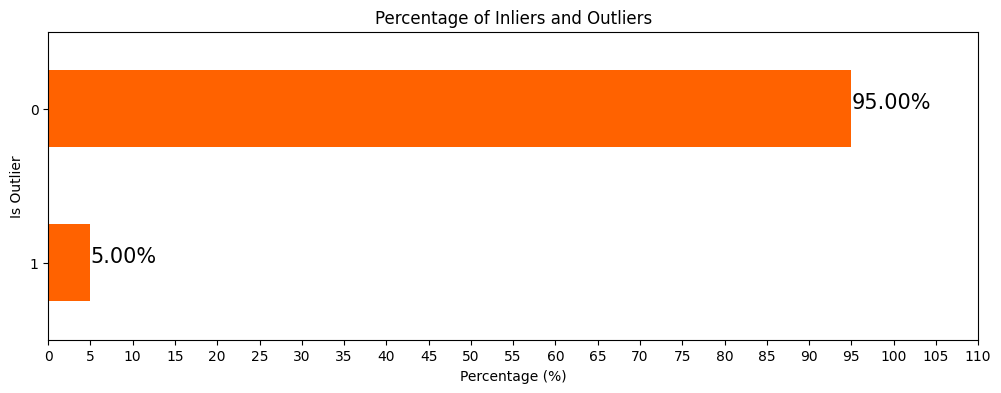

In [171]:
# Calculate the percentage of inliers and outliers
outlier_percentage = customer_data['Is_Anomaly'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#ff6200')

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

# Separate the identified outliers for further analysis and save them as a separate file (optional).
# Remove the outliers from the main dataset to prevent them from influencing the clustering process.
# Drop the Is_Anomaly columns as they were auxiliary columns used for the outlier detection process.

In [172]:
# Separate the outliers for analysis
outliers_data = customer_data[customer_data['Is_Anomaly'] == 1]

# Remove the outliers from the main dataset
customer_data_cleaned = customer_data[customer_data['Is_Anomaly'] == 0]

# Drop Is_Anomaly
customer_data_cleaned = customer_data_cleaned.drop(columns=['Is_Anomaly'])

# Reset the index of the cleaned data
customer_data_cleaned.reset_index(drop=True, inplace=True)

customer_data_cleaned.head()

,CustomerID,MostRecentPurchaseDate,TotalQuantityPurchased,AverageUnitPrice,TotalSales,Country,Transaction_Status,Total_Transactions,Unique_Products_Purchased,MonthYear,MonthlySpending,MonthlySpendingStdDev,SpendingTrend
0,1,2011-11-08 12:06:00,-0.151701,0.008293,-0.099188,United Kingdom,Completed,0.068054,0.015418,2010-12,-0.126810,-0.031219,-0.018792
1,1,2011-11-08 12:06:00,-0.151701,0.008293,-0.099188,United Kingdom,Completed,0.068054,0.015418,2011-02,-0.089183,-0.031219,-0.018792
2,1,2011-11-08 12:06:00,-0.151701,0.008293,-0.099188,United Kingdom,Completed,0.068054,0.015418,2011-03,-0.102130,-0.031219,-0.018792
3,1,2011-11-08 12:06:00,-0.151701,0.008293,-0.099188,United Kingdom,Completed,0.068054,0.015418,2011-05,-0.105454,-0.031219,-0.018792
4,1,2011-11-08 12:06:00,-0.151701,0.008293,-0.099188,United Kingdom,Completed,0.068054,0.015418,2011-06,-0.046976,-0.031219,-0.018792


In [173]:
customer_data_cleaned.shape

(12401, 13)

# PCA Dimensionality Reduction remove redundant information and avoid multicollinearity issue also we can help K-means to find more compact and well-separated clusters.
# removing noise in the data, leading to more accurate and stable clusters by using dimensionality reduction also Enhanced Visualization and Improved Computational Efficiency


In [174]:
from sklearn.decomposition import PCA

# Assuming customer_data is your DataFrame and features are scaled
features = customer_data_cleaned[['TotalQuantityPurchased', 'AverageUnitPrice', 'TotalSales', 
                          'Total_Transactions', 'Unique_Products_Purchased',
                          'MonthlySpending', 'SpendingTrend']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Initialize PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance

# Fit PCA on the scaled features
principal_components = pca.fit_transform(features_scaled)

# Create a DataFrame with the principal components
pca_customerData = pd.DataFrame(data=principal_components, 
                      columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Optionally, add the CustomerID or other identifiers back to the DataFrame
pca_customerData = pd.concat([customer_data_cleaned[['CustomerID']], pca_customerData], axis=1)

pca_customerData.head()


,CustomerID,PC1,PC2,PC3,PC4,PC5
0,1,0.212045,0.319406,-0.280542,-0.499348,0.005684
1,1,0.282888,0.375680,-0.284548,-0.323340,0.070664
2,1,0.258511,0.356316,-0.283170,-0.383904,0.048304
3,1,0.252254,0.351346,-0.282816,-0.399451,0.042565
4,1,0.362353,0.438803,-0.289042,-0.125911,0.143552


# Applying K-means For Clustering the customers, K-Means is an unsupervised machine learning algorithm that clusters data into a specified number of groups (K) This algorithm iteratively assigns each data point to the nearest centroid, then updates the centroids by calculating the mean of all assigned points

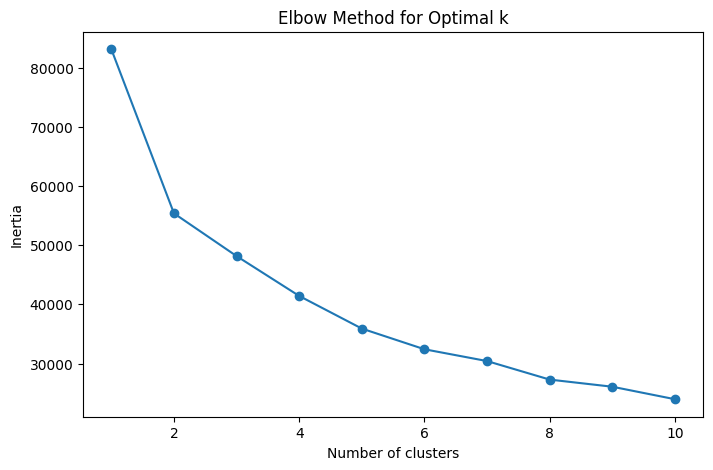

In [175]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_customerData.drop(columns='CustomerID'))
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [176]:
# Apply K-Means with the chosen number of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
pca_customerData['Cluster'] = kmeans.fit_predict(pca_customerData.drop(columns='CustomerID'))

# Display the clustered data
pca_customerData.head()


,CustomerID,PC1,PC2,PC3,PC4,PC5,Cluster
0,1,0.212045,0.319406,-0.280542,-0.499348,0.005684,0
1,1,0.282888,0.375680,-0.284548,-0.323340,0.070664,0
2,1,0.258511,0.356316,-0.283170,-0.383904,0.048304,0
3,1,0.252254,0.351346,-0.282816,-0.399451,0.042565,0
4,1,0.362353,0.438803,-0.289042,-0.125911,0.143552,0


In [177]:
from sklearn.cluster import KMeans
from collections import Counter


# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(pca_customerData)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in {2: 1, 1: 0, 0: 2}.items()}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the PCA DataFrame
pca_customerData['cluster'] = new_labels

# Append the new cluster labels to the original dataset
customer_data_cleaned['cluster'] = pca_customerData['cluster']

customer_data_cleaned.head()


,CustomerID,MostRecentPurchaseDate,TotalQuantityPurchased,AverageUnitPrice,TotalSales,Country,Transaction_Status,Total_Transactions,Unique_Products_Purchased,MonthYear,MonthlySpending,MonthlySpendingStdDev,SpendingTrend,cluster
0,1,2011-11-08 12:06:00,-0.151701,0.008293,-0.099188,United Kingdom,Completed,0.068054,0.015418,2010-12,-0.126810,-0.031219,-0.018792,2
1,1,2011-11-08 12:06:00,-0.151701,0.008293,-0.099188,United Kingdom,Completed,0.068054,0.015418,2011-02,-0.089183,-0.031219,-0.018792,2
2,1,2011-11-08 12:06:00,-0.151701,0.008293,-0.099188,United Kingdom,Completed,0.068054,0.015418,2011-03,-0.102130,-0.031219,-0.018792,2
3,1,2011-11-08 12:06:00,-0.151701,0.008293,-0.099188,United Kingdom,Completed,0.068054,0.015418,2011-05,-0.105454,-0.031219,-0.018792,2
4,1,2011-11-08 12:06:00,-0.151701,0.008293,-0.099188,United Kingdom,Completed,0.068054,0.015418,2011-06,-0.046976,-0.031219,-0.018792,2


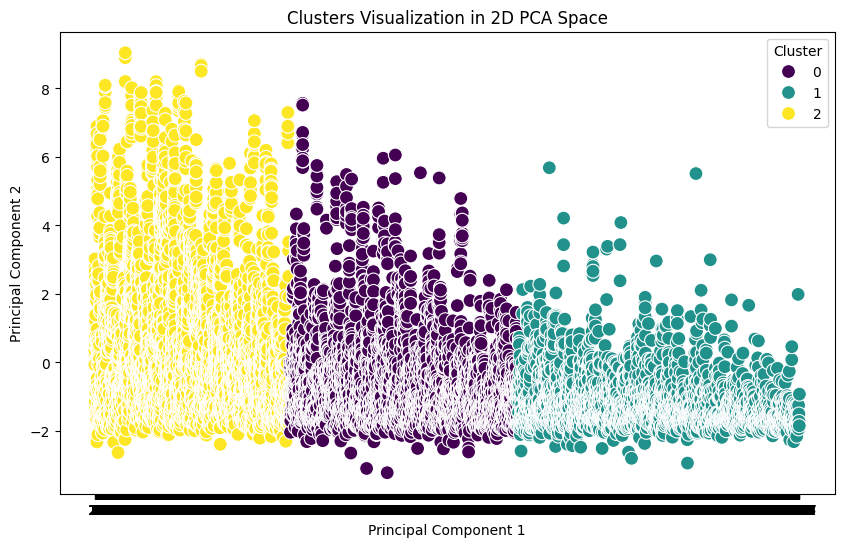

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming pca_customerData is a DataFrame, access columns directly
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_customerData.iloc[:, 0], y=pca_customerData.iloc[:, 1], hue=customer_data_cleaned['cluster'], palette='viridis', s=100)
plt.title('Clusters Visualization in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()



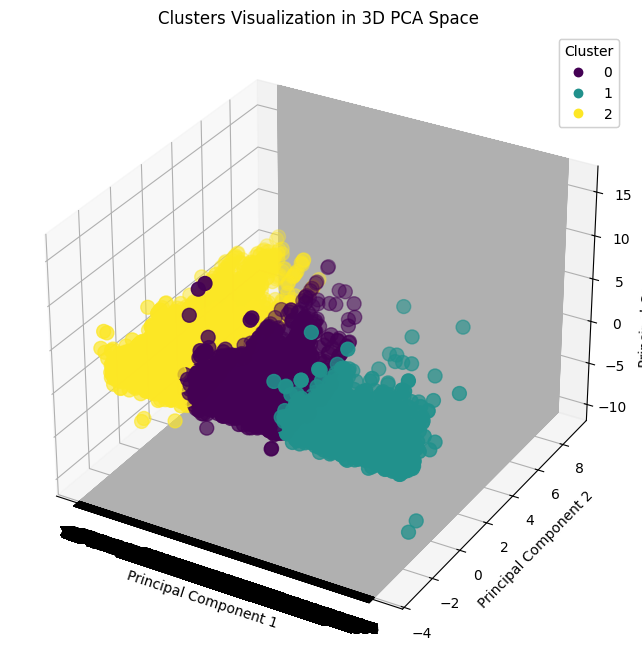

In [179]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 3D Scatter plot of the first three principal components
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Correctly accessing the DataFrame columns using .iloc
sc = ax.scatter(pca_customerData.iloc[:, 0], pca_customerData.iloc[:, 1], pca_customerData.iloc[:, 2], 
                c=customer_data_cleaned['cluster'], cmap='viridis', s=100)

ax.set_title('Clusters Visualization in 3D PCA Space')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Create a legend for the clusters
legend1 = ax.legend(*sc.legend_elements(), title="Cluster")
ax.add_artist(legend1)

plt.show()



# I am set to develop a Recommendation system to enhance the online shopping experience. This system will suggest products to customers based on the purchasing patterns prevalent in their respective clusters.

In [180]:
# Changing the data type of 'CustomerID' to string as it is a unique identifier and not used in mathematical operations
df_cleaned['CustomerID'] = df_cleaned['CustomerID'].astype(str)

# Convert data types of columns to optimal types
df_cleaned = df_cleaned.convert_dtypes()

In [182]:
customer_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12401 entries, 0 to 12400
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CustomerID                 12401 non-null  string        
 1   MostRecentPurchaseDate     12401 non-null  datetime64[ns]
 2   TotalQuantityPurchased     12401 non-null  float64       
 3   AverageUnitPrice           12401 non-null  float64       
 4   TotalSales                 12401 non-null  float64       
 5   Country                    12401 non-null  string        
 6   Transaction_Status         12401 non-null  string        
 7   Total_Transactions         12401 non-null  float64       
 8   Unique_Products_Purchased  12401 non-null  float64       
 9   MonthYear                  12401 non-null  period[M]     
 10  MonthlySpending            12401 non-null  float64       
 11  MonthlySpendingStdDev      12336 non-null  float64       
 12  Spen

In [183]:




#Merge the transaction data with the customer data to get the cluster information for each transaction
merged_data = df_cleaned.merge(customer_data_cleaned[['CustomerID', 'cluster']], on='CustomerID', how='inner')

# Identify the top 10 best-selling products in each cluster based on the total quantity sold
best_selling_products = merged_data.groupby(['cluster', 'StockCode', 'Description'])['Quantity'].sum().reset_index()
best_selling_products = best_selling_products.sort_values(by=['cluster', 'Quantity'], ascending=[True, False])
top_products_per_cluster = best_selling_products.groupby('cluster').head(10)

# Step 5: Create a record of products purchased by each customer in each cluster
customer_purchases = merged_data.groupby(['CustomerID', 'cluster', 'StockCode'])['Quantity'].sum().reset_index()

# Step 6: Generate recommendations for each customer in each cluster
recommendations = []
for cluster in top_products_per_cluster['cluster'].unique():
    top_products = top_products_per_cluster[top_products_per_cluster['cluster'] == cluster]
    customers_in_cluster = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster]['CustomerID']
    
    for customer in customers_in_cluster:
        # Identify products already purchased by the customer
        customer_purchased_products = customer_purchases[(customer_purchases['CustomerID'] == customer) & 
                                                         (customer_purchases['cluster'] == cluster)]['StockCode'].tolist()
        
        # Find top 3 products in the best-selling list that the customer hasn't purchased yet
        top_products_not_purchased = top_products[~top_products['StockCode'].isin(customer_purchased_products)]
        top_3_products_not_purchased = top_products_not_purchased.head(3)
        
        # Append the recommendations to the list
        recommendations.append([customer, cluster] + top_3_products_not_purchased[['StockCode', 'Description']].values.flatten().tolist())

# Step 7: Create a dataframe from the recommendations list and merge it with the original customer data
recommendations_df = pd.DataFrame(recommendations, columns=['CustomerID', 'cluster', 'Rec1_StockCode', 'Rec1_Description', \
                                                 'Rec2_StockCode', 'Rec2_Description', 'Rec3_StockCode', 'Rec3_Description'])
customer_data_with_recommendations = customer_data_cleaned.merge(recommendations_df, on=['CustomerID', 'cluster'], how='right')

customer_data_with_recommendations.to_csv('customer_data_with_recommendations.csv',index=False)

In [184]:
customer_data_with_recommendations.head()

,CustomerID,MostRecentPurchaseDate,TotalQuantityPurchased,AverageUnitPrice,TotalSales,Country,Transaction_Status,Total_Transactions,Unique_Products_Purchased,MonthYear,MonthlySpending,MonthlySpendingStdDev,SpendingTrend,cluster,Rec1_StockCode,Rec1_Description,Rec2_StockCode,Rec2_Description,Rec3_StockCode,Rec3_Description
0,1229,2011-01-26 14:35:00,-0.275451,0.000846,-0.265952,Italy,Completed,-0.571067,-0.578292,2011-01,-0.091650,-0.026363,-0.017710,0,138,JUMBO BAG RED RETROSPOT,963,WORLD WAR 2 GLIDERS ASSTD DESIGNS,9.0,ASSORTED COLOUR BIRD ORNAMENT
1,1230,2011-09-15 12:51:00,-0.280239,-0.076380,-0.277817,United Kingdom,Completed,-0.500053,-0.348229,2011-01,-0.234971,-0.035680,-0.017787,0,963,WORLD WAR 2 GLIDERS ASSTD DESIGNS,9,ASSORTED COLOUR BIRD ORNAMENT,121.0,COLOUR GLASS T-LIGHT HOLDER HANGING
2,1230,2011-09-15 12:51:00,-0.280239,-0.076380,-0.277817,United Kingdom,Completed,-0.500053,-0.348229,2011-09,-0.213802,-0.035680,-0.017787,0,963,WORLD WAR 2 GLIDERS ASSTD DESIGNS,9,ASSORTED COLOUR BIRD ORNAMENT,121.0,COLOUR GLASS T-LIGHT HOLDER HANGING
3,1230,2011-09-15 12:51:00,-0.280239,-0.076380,-0.277817,United Kingdom,Completed,-0.500053,-0.348229,2011-01,-0.234971,-0.035680,-0.017787,0,963,WORLD WAR 2 GLIDERS ASSTD DESIGNS,9,ASSORTED COLOUR BIRD ORNAMENT,121.0,COLOUR GLASS T-LIGHT HOLDER HANGING
4,1230,2011-09-15 12:51:00,-0.280239,-0.076380,-0.277817,United Kingdom,Completed,-0.500053,-0.348229,2011-09,-0.213802,-0.035680,-0.017787,0,963,WORLD WAR 2 GLIDERS ASSTD DESIGNS,9,ASSORTED COLOUR BIRD ORNAMENT,121.0,COLOUR GLASS T-LIGHT HOLDER HANGING
